# EastWestAirlines(Q1)

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Load the data
data1 = pd.read_csv('EastWestairlines.csv')

# Display the first few rows of the dataset
data1.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [43]:
# Select relevant features for clustering
X1 = data1.drop(columns = ['ID#','Award?'])
# Assuming you want to exclude the 'ID' and 'Award' columns
# Display the selected features
X1.head()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
0,28143,0,1,1,1,174,1,0,0,7000
1,19244,0,1,1,1,215,2,0,0,6968
2,41354,0,1,1,1,4123,4,0,0,7034
3,14776,0,1,1,1,500,1,0,0,6952
4,97752,0,4,1,1,43300,26,2077,4,6935


### Standardization

In [44]:
scaler = StandardScaler()
X_scaled1 = scaler.fit_transform(X1)
df_norm1 = pd.DataFrame(data = X_scaled1,columns = ['Balance','Qual_miles','cc1_miles','cc2_miles','cc3_miles','Bonus_miles','Bonus_trans','Flight_miles_12mo','Flight_trans_12','Days_since_enroll'])

### Hierarchical Clustering Dendrogram

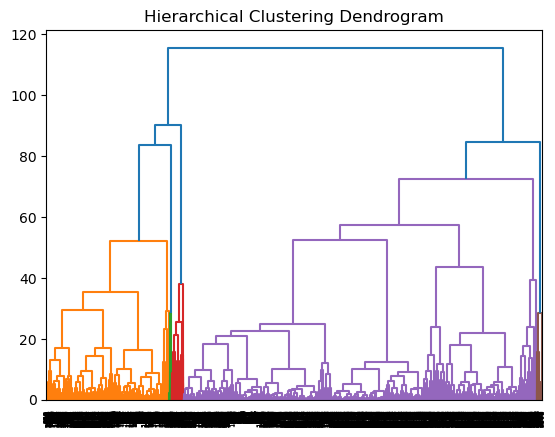

In [45]:
linked1 = linkage(X_scaled1, method='ward')
dendrogram(linked1, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

### K-means Clustering

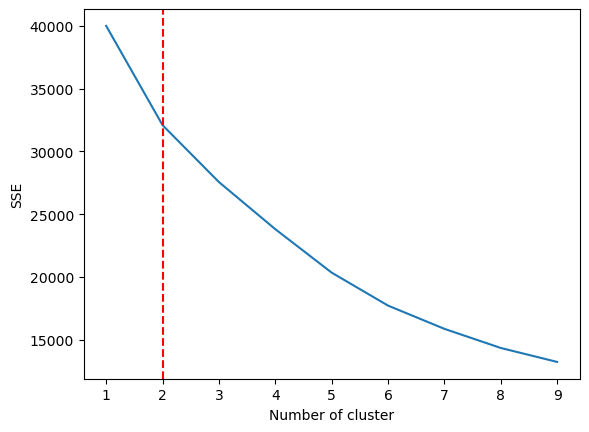

In [46]:
# Determine the optimal number of clusters using the elbow method
sse1 = {}
for k in range(1, 10):
    kmeans1 = KMeans(n_clusters=k, max_iter=1000,n_init = 10).fit(X_scaled1)
    sse1[k] = kmeans1.inertia_

plt.figure()
plt.plot(list(sse1.keys()), list(sse1.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

# calculate the differences between consecutive points(Calculate differences: We want to know how much the sum of squares (the “tightness” of our clusters) changes when we add another cluster. So, we subtract each sum of squares from the one before it. This is like figuring out how much taller each of your friends is than the next.)
differences1 = np.diff(list(sse1.values()))

# calculate the second derivative(Now we want to see how much those differences change. This is like if you then figured out how much the differences in your friends’ heights changed.)
second_differences1 = np.diff(differences1)

# find the elbow point where the second derivative is maximum
elbow_point1 = np.where(second_differences1 == max(second_differences1))[0][0] + 2
# adding 2 because the index is 0-based and we're calculating the second derivative

plt.axvline(x=elbow_point1, color='r', linestyle='--')
plt.show()

#### K-Means Clustering by Optimal Number of Clusters 

In [47]:
# Based on the elbow method, choose the optimal number of clusters (K)
k_optimal = 2  # You might choose the point where the elbow occurs

# Apply K-means clustering
kmeans1 = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=23)
data1['KMeans_Cluster'] = kmeans1.fit_predict(X_scaled1)

# Display the data with K-means clusters
data1[['Bonus_miles', 'KMeans_Cluster']].head()

silhouette_kmeans1 = silhouette_score(X_scaled1, data1['KMeans_Cluster'])
print(f"Silhouette Score for K-means: {silhouette_kmeans1}")

Silhouette Score for K-means: 0.35826638416515033


## DBSCAN

In [48]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of values for eps and min_samples you want to test
eps_values = np.arange(1.0, 8.0, 1)
min_samples_values = np.arange(1, 10, 1)

# Initialize variables to store the optimal parameters and silhouette score
optimal_eps = 0
optimal_min_samples = 0
highest_silhouette = -1

# Iterate over the range of parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan1 = DBSCAN(eps=eps, min_samples=min_samples)
        clusters1 = dbscan1.fit_predict(X_scaled1)
        silhouette1 = silhouette_score(X_scaled1, clusters1)
        
        # If the silhouette score is higher than the current highest, update the optimal parameters
        if silhouette1 > highest_silhouette:
            highest_silhouette = silhouette1
            optimal_eps = eps
            optimal_min_samples = min_samples

print(f"Optimal eps: {optimal_eps}, Optimal min_samples: {optimal_min_samples}")
print(f"Highest Silhouette Score: {highest_silhouette}")


Optimal eps: 7.0, Optimal min_samples: 1
Highest Silhouette Score: 0.867447784990924


In [49]:
# Evaluate Clustering Performance (Silhouette Score)
print(f"Silhouette Score for K-means: {silhouette_kmeans1}")
print(f"Silhouette Score for DBSCAN: {highest_silhouette}")


Silhouette Score for K-means: 0.35826638416515033
Silhouette Score for DBSCAN: 0.867447784990924


## Hierarchical clustering

In [50]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'complete',distance_threshold=None)

In [51]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm1)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])
y_hc

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [52]:
set(y_hc)

{0, 1, 2, 3, 4}

In [53]:
X1['h_clusterid'] = y_hc

In [54]:
X1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,0
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,0
3995,64385,0,1,1,1,981,5,0,0,1395,0
3996,73597,0,3,1,1,25447,8,0,0,1402,0
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [55]:
X1=X1.sort_values("h_clusterid")
#X1.iloc[:,[0,-1]]
X1

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,h_clusterid
0,28143,0,1,1,1,174,1,0,0,7000,0
2655,40893,0,1,1,1,1130,3,0,0,2518,0
2656,644881,2600,1,1,1,14350,28,10850,26,2511,0
2657,61081,0,4,1,1,37682,21,2000,4,2509,0
2658,27438,0,1,1,1,2528,6,2528,6,2490,0
...,...,...,...,...,...,...,...,...,...,...,...
896,218763,8753,1,1,1,11650,6,1150,3,5975,4
3332,35661,7487,1,1,1,600,3,500,2,1759,4
833,114932,8559,1,1,1,3150,13,1650,12,6092,4
800,74924,6286,4,1,1,59650,13,0,0,6141,4


In [56]:
X1.groupby("h_clusterid").mean()

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll
h_clusterid,,,,,,,,,,
0,70225.276063,111.310729,2.051366,1.014676,1.000759,16762.410172,11.460526,435.835020,1.303391,4106.882844
1,131999.500000,347.000000,2.500000,1.000000,1.000000,65634.250000,69.250000,19960.000000,49.250000,2200.250000
2,138061.400000,78.800000,3.466667,1.000000,4.066667,93927.866667,28.066667,506.666667,1.600000,4613.866667
3,973710.307692,746.615385,2.538462,1.000000,1.000000,29401.076923,16.615385,1576.384615,6.615385,6972.846154
4,102951.000000,8275.866667,2.266667,1.000000,1.000000,17568.400000,12.666667,627.333333,2.333333,4737.466667


# CrimeData(Q2)

In [57]:
data2 = pd.read_csv("crime_data.csv")
data2.columns = ['Cities','Murder','Assault','UrbanPop','Rape']
data2

,Cities,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [58]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Cities    50 non-null     object 
 1   Murder    50 non-null     float64
 2   Assault   50 non-null     int64  
 3   UrbanPop  50 non-null     int64  
 4   Rape      50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [59]:
data2.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Standardization

In [60]:
x_scaled2 = scaler.fit_transform(data2.iloc[:,1:])
x_scaled2 = pd.DataFrame(data = x_scaled2,columns = ['Murder','Assault','UrbanPop','Rape'])
x_scaled2

,Murder,Assault,UrbanPop,Rape
0,1.255179,0.790787,-0.526195,-0.003451
1,0.513019,1.118060,-1.224067,2.509424
2,0.072361,1.493817,1.009122,1.053466
3,0.234708,0.233212,-1.084492,-0.186794
4,0.281093,1.275635,1.776781,2.088814
5,0.025976,0.402909,0.869548,1.883901
6,-1.040880,-0.736484,0.799761,-1.092723
7,-0.437875,0.815030,0.450825,-0.585834
8,1.765415,1.990786,1.009122,1.150530
9,2.229265,0.487757,-0.386621,0.492653


## Hierarchical Clustering

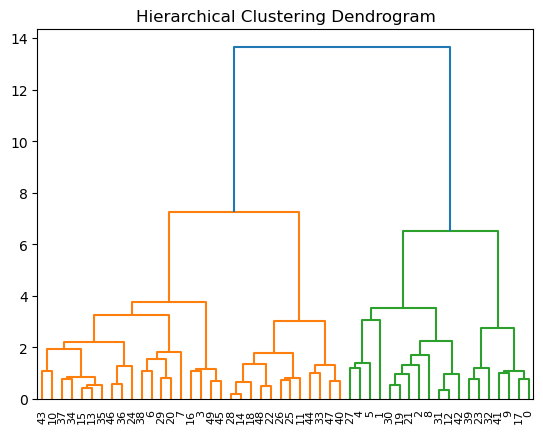

In [61]:
linked2 = linkage(x_scaled2, method='ward')
dendrogram(linked2, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.show()

In [62]:
# create clusters
hc = AgglomerativeClustering(n_clusters=5, metric = 'euclidean', linkage = 'complete',distance_threshold=None)

In [64]:
# save clusters for chart
y_hc2 = hc.fit_predict(x_scaled2)
# Clusters=pd.DataFrame(y_hc,columns=['Clusters'])

In [65]:
print(y_hc)
print(f'\n{set(y_hc2)}')

[0 0 0 ... 0 0 0]

{0, 1, 2, 3, 4}


In [66]:
data2['h_clusterid'] = y_hc2
data2

,Cities,Murder,Assault,UrbanPop,Rape,h_clusterid
0,Alabama,13.2,236,58,21.2,1
1,Alaska,10.0,263,48,44.5,4
2,Arizona,8.1,294,80,31.0,2
3,Arkansas,8.8,190,50,19.5,0
4,California,9.0,276,91,40.6,2
5,Colorado,7.9,204,78,38.7,2
6,Connecticut,3.3,110,77,11.1,0
7,Delaware,5.9,238,72,15.8,0
8,Florida,15.4,335,80,31.9,2
9,Georgia,17.4,211,60,25.8,1


In [67]:
data2.groupby("h_clusterid").mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,5.871429,134.476190,70.761905,18.580952
1,14.671429,251.285714,54.285714,21.685714
2,11.054545,264.090909,79.090909,32.618182
3,3.180000,78.700000,49.300000,11.630000
4,10.000000,263.000000,48.000000,44.500000


## K-means Clustering

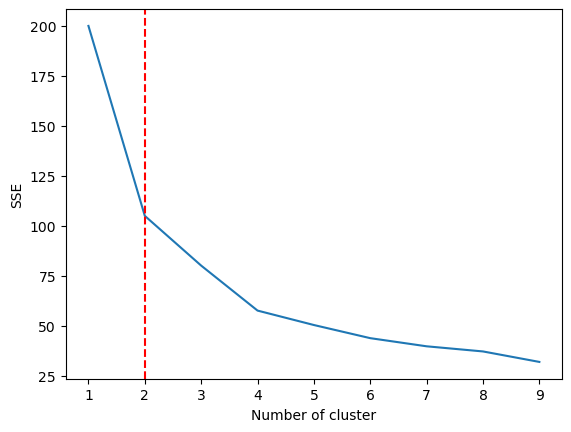

In [68]:
# Determine the optimal number of clusters using the elbow method
import os
os.environ["OMP_NUM_THREADS"] = '2'
sse2 = {}
for k in range(1, 10):
    kmeans2 = KMeans(n_clusters=k, max_iter=1000,n_init = 10).fit(x_scaled2)
    sse2[k] = kmeans2.inertia_

plt.figure()
plt.plot(list(sse2.keys()), list(sse2.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")

# calculate the differences between consecutive points(Calculate differences: We want to know how much the sum of squares (the “tightness” of our clusters) changes when we add another cluster. So, we subtract each sum of squares from the one before it.)
differences2 = np.diff(list(sse2.values()))

# calculate the second derivative(Now we want to see how much those differences change.
second_differences2 = np.diff(differences2)

# find the elbow point where the second derivative is maximum
elbow_point2 = np.where(second_differences2 == max(second_differences2))[0][0] + 2
# adding 2 because the index is 0-based and we're calculating the second derivative

plt.axvline(x=elbow_point2, color='r', linestyle='--')
plt.show()

import warnings
warnings.filterwarnings('ignore')

In [69]:
# Based on the elbow method, choose the optimal number of clusters (K)
k_optimal = 2

# Apply K-means clustering
kmeans2 = KMeans(n_clusters=k_optimal, init='k-means++', max_iter=300, n_init=10, random_state=23)
data2['KMeans_Cluster'] = kmeans2.fit_predict(x_scaled2)

# Display the data with K-means clusters
data2[['Cities', 'KMeans_Cluster']].head()

silhouette_kmeans2 = silhouette_score(x_scaled2, data2['KMeans_Cluster'])
print(f"Silhouette Score for K-means: {silhouette_kmeans2}")

Silhouette Score for K-means: 0.4084890326217641


## DBSCAN Clustering

In [70]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import numpy as np

# Define the range of values for eps and min_samples you want to test
eps_values = np.arange(0.6, 4.0, 0.1)
min_samples_values = np.arange(4, 9, 1)

# Initialize variables to store the optimal parameters and silhouette score
optimal_eps = 0
optimal_min_samples = 0
highest_silhouette = -1

# Iterate over the range of parameter values
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan2 = DBSCAN(eps=eps,min_samples=min_samples)
        clusters2 = dbscan2.fit_predict(x_scaled2)
        if len(set(clusters2)) >= 2:
            silhouette2 = silhouette_score(x_scaled2, clusters2)
        
        # If the silhouette score is higher than the current highest, update the optimal parameters
            if silhouette2 > highest_silhouette:
                highest_silhouette = silhouette2
                optimal_eps = eps
                optimal_min_samples = min_samples

                print(f"\nOptimal eps: {optimal_eps}, Optimal min_samples: {optimal_min_samples}")
                print(f"Highest Silhouette Score: {highest_silhouette}")
                print(set(clusters2))


Optimal eps: 0.6, Optimal min_samples: 4
Highest Silhouette Score: -0.1366691851063249
{0, -1}

Optimal eps: 0.7, Optimal min_samples: 4
Highest Silhouette Score: -0.06558897626356919
{0, 1, -1}

Optimal eps: 0.7999999999999999, Optimal min_samples: 4
Highest Silhouette Score: 0.19671925471369056
{0, -1}

Optimal eps: 0.8999999999999999, Optimal min_samples: 4
Highest Silhouette Score: 0.266781916070482
{0, -1}

Optimal eps: 1.0999999999999999, Optimal min_samples: 5
Highest Silhouette Score: 0.3907373331499921
{0, -1}

Optimal eps: 1.1999999999999997, Optimal min_samples: 7
Highest Silhouette Score: 0.4047944502519567
{0, -1}
